<center><b>Designing a RBF network</b></center>

The classification of non-linearly separable data can be achieved by designing a Radial Basis Function (RBF) network. It involves the following steps:
<ul>
    <li>Identify potential clusters in the data and assign clusterheads.</li>
    <li>Define probability density functions for the clusterheads and train a network to perform classification.</li>
</ul>

In [1]:
#Import statements
import numpy as np
import math
import matplotlib.pyplot as plt

<b>Data generation</b>

In [110]:
#Initialization

n = 100

X = np.random.uniform(low = 0, high = 1, size = (n*2,))
X = X.reshape(n, 2)
print("Shape of X vector:", X.shape)

Shape of X vector: (100, 2)


In [111]:
#Generate labels

def getCurveEqnVal(x):
    return 1.0 / 5.0 * math.sin(10 * x) + 0.3

def getCircleEqnVal(x1, x2):
    return math.pow((x2 - 0.8), 2) + math.pow((x1 - 0.5), 2)

def assignLabel(x1, x2):
    if x2 < getCurveEqnVal(x1) or getCircleEqnVal(x1, x2) < math.pow(0.15, 2):
        return 1
    return -1

Y = np.zeros(n).reshape(n, 1)

for i in range(n):
    x = X[i]
    Y[i] = assignLabel(x[0], x[1])

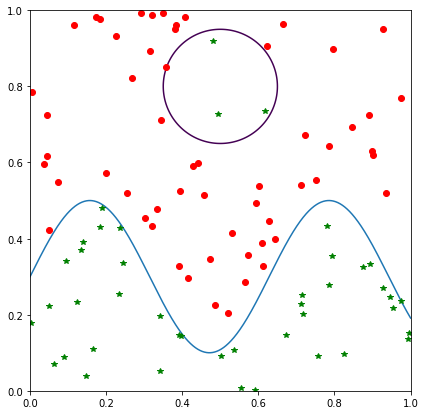

In [326]:
#Plot the input vs output
def plotGraphWithDataPoints(X, Y):
    #Step 1: Plot the graph with the curve/circle equations
    fig = plt.figure()
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = [7, 7]

    #Curve equation
    x = np.linspace(0, 1, 1000)
    ax.plot(x, 1 / 5 * np.sin(10 * x) + 0.3)
    
    #Circle equation
    r = 0.15
    x_temp = np.linspace(0, 1, 1000)
    y_temp = np.linspace(0, 1, 1000)
    x, y = np.meshgrid(x_temp,y_temp)
    circle_points = ((y - 0.8) ** 2) + ((x - 0.5) ** 2) - (r ** 2)
    plt.contour(x,y,circle_points,[0])
    
    plt.gca().set_aspect('equal')
    
    for i in range(n):
        if Y[i] == 1:
            plt.plot(X[i][0], X[i][1], 'g*')
        else:
            plt.plot(X[i][0], X[i][1], 'ro')
    
    plt.show()
    
plotGraphWithDataPoints(X, Y)

<b>Identifying clusterheads using K-means algorithm for 20 clusters</b>

In [114]:
#Extracting C+ and C- classes separately
Y_Cplus = np.argwhere(Y == 1)[:, 0]
Y_Cminus = np.argwhere(Y == -1)[:, 0]

X_Cplus = X[Y_Cplus]
X_Cminus = X[Y_Cminus]

In [311]:
def plotDataPoints(X, Y, C, showDataPoints = False, showBoundaries = False):
    fig = plt.figure()
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = [7, 7]
    
    if showBoundaries:
        #Curve equation
        x = np.linspace(0, 1, 1000)
        ax.plot(x, 1 / 5 * np.sin(10 * x) + 0.3)

        #Circle equation
        r = 0.15
        x_temp = np.linspace(0, 1, 1000)
        y_temp = np.linspace(0, 1, 1000)
        x, y = np.meshgrid(x_temp,y_temp)
        circle_points = ((y - 0.8) ** 2) + ((x - 0.5) ** 2) - (r ** 2)
        plt.contour(x,y,circle_points,[0])

        plt.gca().set_aspect('equal')
        
    if showDataPoints:
        for i in range(n):
            if Y[i] == 1:
                plt.plot(X[i][0], X[i][1], '*', color = 'green')
            else:
                plt.plot(X[i][0], X[i][1], '.', color = 'red')
        plt.title("Clusterheads for classes C+ and C- with original data points")
    else:
        plt.title("Clusterheads for classes C+ and C-")
    
    for i in range(C.shape[0]//2):
        if i == 0:
            plt.plot(C[i][0], C[i][1], 'x', color = 'green', label = 'C+ clusterheads')
        else:
            plt.plot(C[i][0], C[i][1], 'x', color = 'green')
    for i in range(C.shape[0]//2, C.shape[0]):
        if i == C.shape[0]//2:
            plt.plot(C[i][0], C[i][1], 's', color = 'red', label = 'C- clusters')
        else:
            plt.plot(C[i][0], C[i][1], 's', color = 'red')
        
    plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
    plt.show()

In [267]:
def initialize_clusters(X, K):
    N, D = X.shape
    mu = np.zeros((K,D))
    
    #Draw initial points of the clusters at random from available data points
    dataPoints = list(range(N))
    dataPoints = np.random.permutation(dataPoints)
    mu = X[dataPoints[0:K], :].copy()
    return mu

def Kmeans(X, C, className, plotClusterheads = True):
    #X - datapoints
    #C - initial clusters
    
    C_old = C.copy()
    N, D = X.shape
    cluster_count, cluster_dimension = C.shape
    max_iterations = 100
    
    assigned_clusters = np.zeros((N,), dtype = int)
    
    for cntr in range(max_iterations):
        assigned_clusters_old = assigned_clusters.copy()
        for i in range(N):
            bestDist = -1
            bestCluster = -1
            for j in range(cluster_count):
                curDist = np.linalg.norm(X[i, :] - C_old[j, :])
                if curDist < bestDist or bestDist == -1:
                    bestDist = curDist
                    bestCluster = j
            assigned_clusters[i] = bestCluster

        C_new = np.zeros((cluster_count, D))
        for i in range(cluster_count):
            C_new[i, :] = np.mean(X[assigned_clusters == i], axis = 0)
        
        C_old = C_new.copy()

        if np.all(assigned_clusters_old == assigned_clusters):
            print("Convergence in", cntr + 1, "iterations")
            break
    
    if plotClusterheads:
        fig = plt.figure()
        ax = plt.axes()
        plt.rcParams["figure.figsize"] = [7, 7]

        #Curve equation
        x = np.linspace(0, 1, 1000)
        ax.plot(x, 1 / 5 * np.sin(10 * x) + 0.3)

        #Circle equation
        r = 0.15
        x_temp = np.linspace(0, 1, 1000)
        y_temp = np.linspace(0, 1, 1000)
        x, y = np.meshgrid(x_temp,y_temp)
        circle_points = ((y - 0.8) ** 2) + ((x - 0.5) ** 2) - (r ** 2)
        plt.contour(x,y,circle_points,[0])

        plt.gca().set_aspect('equal')

        plt.plot(C_new[:, 0], C_new[:, 1], 'x', color = 'red')

        colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'orange', 'grey']
        for i in range(cluster_count):
            X_points = X[assigned_clusters == i]
            plt.plot(X_points[:, 0], X_points[:, 1], '.', color = colors[i%len(colors)])
            plt.plot(C_new[i][0], C_new[i][1], 'x', color = colors[i%len(colors)])

        plt.title("Clusterheads for class " + className)
        plt.show()
    
    return C_new

In [377]:
N = 20 #Number of clusters
C = np.zeros((N, X.shape[1])) #Cluster points
C[0:N//2, :] = initialize_clusters(X_Cplus, N//2)
C[N//2: N, :] = initialize_clusters(X_Cminus, N//2)

Convergence in 3 iterations


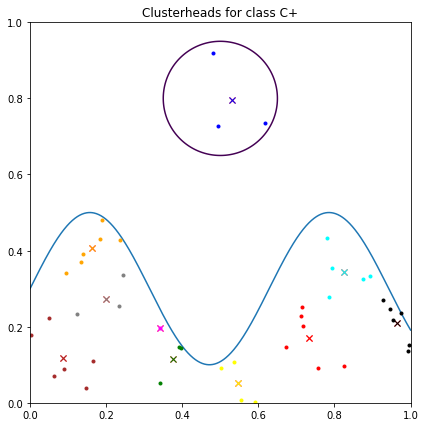

In [378]:
C[0:N//2, :] = Kmeans(X_Cplus, C[0:N//2, :], "C+")

Convergence in 7 iterations


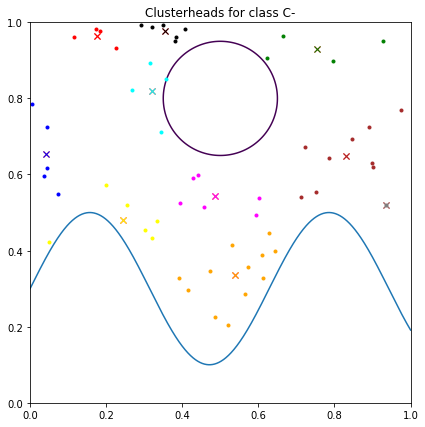

In [379]:
C[N//2: N, :] = Kmeans(X_Cminus, C[N//2:N, :], "C-")

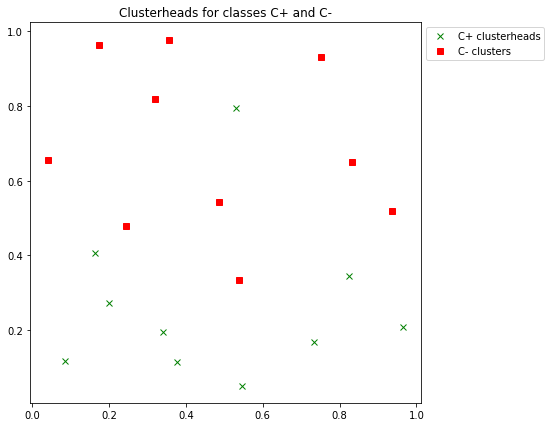

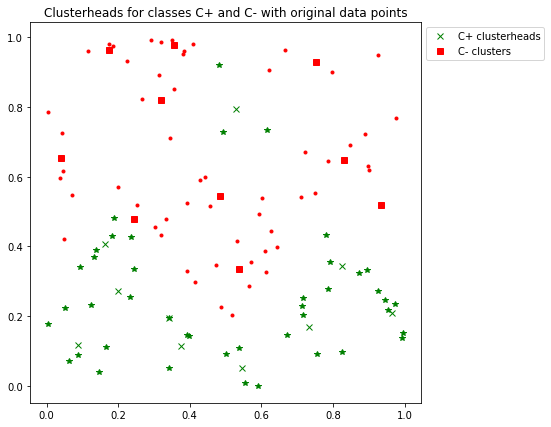

In [380]:
#Plotting all clusterheads together
plotDataPoints(X, Y, C)
plotDataPoints(X, Y, C, True)

<b>Designing RBF network</b>

In [313]:
def rbf(X, C, sigma = 20):
    #sigma = 20 was chosen after iterating through values 1 through 20 (for transformation leading to zero misclassifications)
    return np.exp(-sigma * (np.linalg.norm(X-C) ** 2))

def getTransformedDataPoints(X, C):
    N, oldD = X.shape
    newD = C.shape[0]
    
    X_transform = np.zeros((N, newD + 1))
    
    for i in range(N):
        curData = X[i]
        temp = curData - C
        X_transform[i][0] = 1
        for j in range(newD):
            X_transform[i][j+1] = rbf(curData, C[j])
    return X_transform

In [381]:
X_transformed = getTransformedDataPoints(X, C)

In [315]:
def plotMisclassifications(misclassifications_counter, epoch):
    plt.plot(range(epoch+1), misclassifications_counter)
    plt.title('Epoch vs misclassifications')
    plt.xlabel('Epoch')
    plt.ylabel('#Misclassifications')

In [316]:
def initW(N):
    mean_val = 0
    variance_val = 1/N
    
    W = np.random.normal(mean_val, math.sqrt(1), N)
    W = np.asarray(W).reshape(N, 1)
    return W

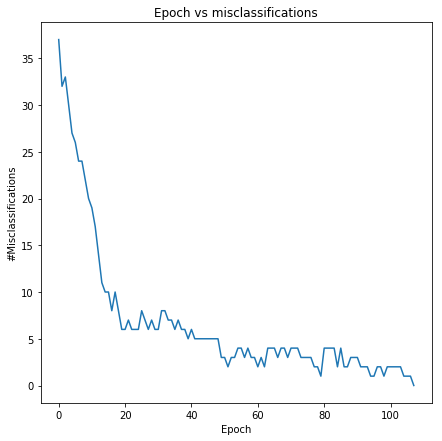

In [382]:
#PTA

def getG(X, W):
    Y_val = np.matmul(W.T, X)
    return Y_val[0]

def getLabel(Y):
    if Y >= 0:
        return 1
    return -1

def getMisclassificationsCount(X, W):
    count = 0
    for i in range(X.shape[0]):
        Yprime = getLabel(getG(X[i], W))
        if Yprime != Y[i]:
            count += 1
    return count

#Function to update weights for PTA
def updateWeightsForPTA(omega, eta, xi, di):
    c = getLabel(getG(xi, omega))
    omega = omega + (eta * xi * (di - c))
    return omega

#Function to implement PTA
def PTA(W, X, Y, eta):
    wprime = W.copy()
    epoch = 0

    misclassfications_counter = [getMisclassificationsCount(X, wprime)]

    while(misclassfications_counter[epoch] > 0 and epoch < 5000):
        epoch += 1
        for i in range(X.shape[0]):
            xi = X[i].reshape(X.shape[1], 1)
            wprime = updateWeightsForPTA(wprime, eta, xi, Y[i])
        misclassfications_counter.append(getMisclassificationsCount(X, wprime))

    return epoch, misclassfications_counter, wprime

eta = 0.01
W_init = initW(C.shape[0] + 1)
epoch, misclassifications_counter, W = PTA(W_init, X_transformed, Y, eta)
plotMisclassifications(misclassifications_counter, epoch)

In [389]:
def drawDecisionBoundary(X, x_G):
    fig = plt.figure()
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = [7, 7]
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.plot(x_G[:, 0], x_G[:, 1], ',', color = 'blue')

    for i in range(n):
        if Y[i] == 1:
            plt.plot(X[i][0], X[i][1], '*', color = 'green')
        else:
            plt.plot(X[i][0], X[i][1], '.', color = 'red')

    plt.show()

In [350]:
#Plotting the decision boundary
def getDecisionBoundary(W, C, threshold = 0.005):
    threshold_pos = abs(threshold)
    threshold_neg = -1.0 * threshold_pos
    x_G = np.asarray([0, 0]).reshape(1, 2)

    x1 = 0
    while x1 <= 1:
        x2 = 0
        while x2 <= 1:
            curVal = np.asarray([x1, x2]).reshape(1, 2)
            curVal_transformed = getTransformedDataPoints(curVal, C).T
            g = getG(curVal_transformed, W)
            if g >= threshold_neg and g <= threshold_pos: 
                x_G = np.append(x_G, curVal, axis = 0)
            x2 += 0.001
            x2 = round(x2, 3)
        x1 += 0.001
        x1 = round(x1, 3)
    
    return x_G

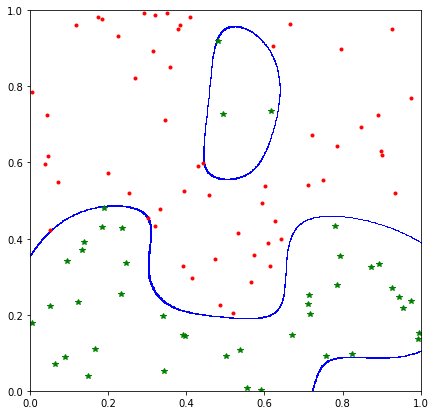

In [400]:
x_G = getDecisionBoundary(W, C, 0.003)
drawDecisionBoundary(X, x_G)

<b>Identifying clusterheads using K-means algorithm for 4 clusters</b>

In [334]:
N = 4 #Number of clusters
C = np.zeros((N, X.shape[1])) #Cluster points
C[0:N//2, :] = initialize_clusters(X_Cplus, N//2)
C[N//2: N, :] = initialize_clusters(X_Cminus, N//2)

Convergence in 6 iterations


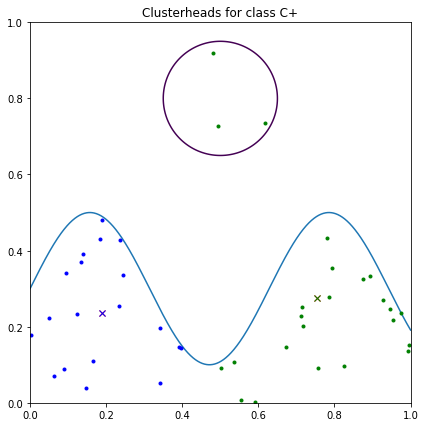

In [335]:
C[0:N//2, :] = Kmeans(X_Cplus, C[0:N//2, :], 'C+')

Convergence in 6 iterations


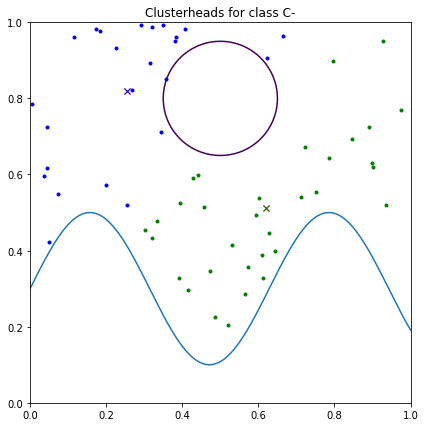

In [336]:
C[N//2: N, :] = Kmeans(X_Cminus, C[N//2:N, :], 'C-')

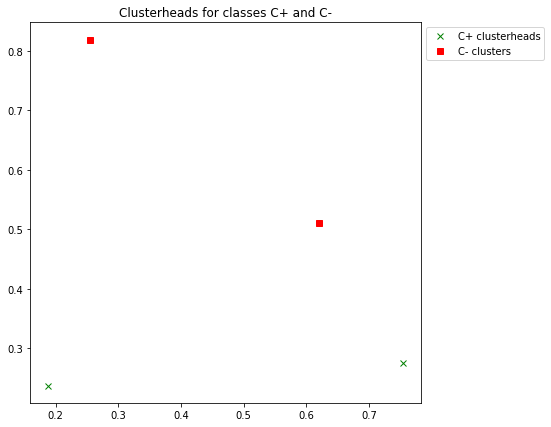

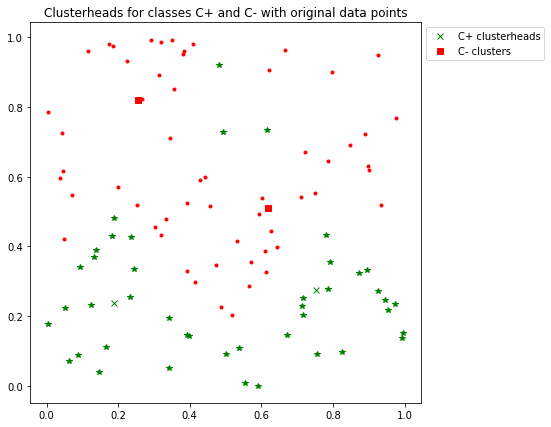

In [352]:
#Plotting all clusterheads together
plotDataPoints(X, Y, C)
plotDataPoints(X, Y, C, True)

<b>Designing RBF network</b>

In [353]:
X_transformed = getTransformedDataPoints(X, C)

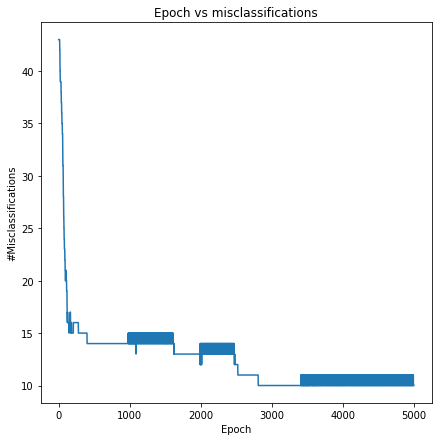

In [361]:
#Initialize weights
eta = 0.0001
W_init = initW(C.shape[0] + 1)
epoch, misclassifications_counter, W = PTA(W_init, X_transformed, Y, eta)
plotMisclassifications(misclassifications_counter, epoch)

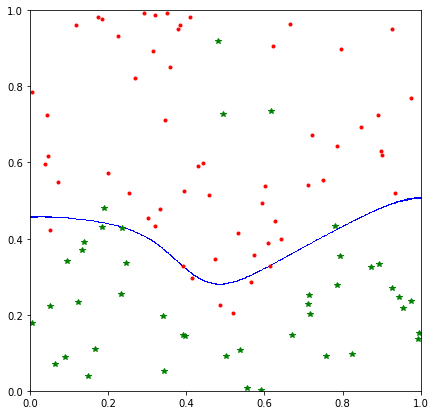

In [363]:
x_G = getDecisionBoundary(W, C, 0.001)
drawDecisionBoundary(X, x_G)

<b>Observations:</b>
<ul>
    <li>The Radial basis function used is <b>e^(-sigma * ||x-y||^2)</b></li>
    <li>Using 20 clusters resulted in a network that could perfectly classify the data points, i.e., the Perceptron Training Algorithm converged with zero misclassifications.</li>
    <li>However, the PTA didn't converge when 4 clusters were used and resulted in a decision boundary with misclassifications.</li>
    <li>The RBF function results in transformation of the data in 2D space into higher dimensions.</li>
    <li>In the case of 20 clusters, it resulted in 20 dimensional space which lead to the following scenario: the data points in 2 dimensions which weren't linearly separable were transformed into linearly separable data in a 20 dimensional space.</li>
    <li>This was not the case for a 4 dimensional space. Though the data was transformed into a higher dimensional space, linearity wasn't achieved due a smaller higher dimension.</li>
    <li>Thus, it can be concluded that a 20 dimensional space results in transformation for converting the original 2D data into linearly separable 20D data for this dataset. Thus, RBF transformation into 20 dimensions is an optimal transformation for the given dataset.</li>
</ul>